In [23]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import os
import sys

PseudoCode

In [24]:
"""
#function to detect if the image is blurry or not (def detect_blurry_and_contrast_image)

load image in grayscale

if detect_low_contrast_image(img)==true {
    print("image is low contrast")
    process_low_contrast_image(img) 

    if detect_blurry_image(binary_image)==true{
    apply process_blurry_image(binary_image)
    }
    else{
    return false image is not blurry
    }
}
else{
    print("image is not low contrast")
    if detect_blurry_image(img)==true{
    print("image is blurry")
    process_blurry_image(img)
     
    }
    else{
     print("image is not blurry")
     return false image is not blurry
    }
}end of function

"""



'\n#function to detect if the image is blurry or not (def detect_blurry_and_contrast_image)\n\nload image in grayscale\n\nif detect_low_contrast_image(img)==true {\n    print("image is low contrast")\n    process_low_contrast_image(img) \n\n    if detect_blurry_image(binary_image)==true{\n    apply process_blurry_image(binary_image)\n    }\n    else{\n    return false image is not blurry\n    }\n}\nelse{\n    print("image is not low contrast")\n    if detect_blurry_image(img)==true{\n    print("image is blurry")\n    process_blurry_image(img)\n     \n    }\n    else{\n     print("image is not blurry")\n     return false image is not blurry\n    }\n}end of function\n\n'

In [25]:
def process_blurry_images(image_path):
    """
    Process an image to prepare it for barcode detection. This includes sharpening,
    converting to grayscale, and applying binary thresholding.

    Parameters:
    - image_path (str): Path to the image file.
    """
    try:
        # Load the image
        image = Image.open(image_path)

        # Display the original image
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")
        plt.show()

        # Step 1: Apply sharpening filter
        sharpened_image = image.filter(ImageFilter.SHARPEN)

        # Display the sharpened image
        plt.figure(figsize=(6, 6))
        plt.imshow(sharpened_image)
        plt.title("Sharpened Image")
        plt.axis("off")
        plt.show()

        # Step 2: Convert the sharpened image to grayscale using OpenCV
        sharpened_image_cv = cv2.cvtColor(np.array(sharpened_image), cv2.COLOR_RGB2BGR)
        gray_image = cv2.cvtColor(sharpened_image_cv, cv2.COLOR_BGR2GRAY)

        # Step 3: Apply binary thresholding to isolate the barcode
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Display the binary image
        plt.figure(figsize=(12, 8))
        plt.imshow(binary_image, cmap="gray")
        plt.title("Binary Image")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


def process_low_contrast_image(image_path):
    """
    Process the image by converting it to grayscale, applying median blur, 
    and performing binary thresholding.

    Parameters:
    - image_path (str): Path to the image file.

    Returns:
    - binary_image (numpy.ndarray): The binary thresholded image.
    """
    # Load the original image
    original_image = cv2.imread(image_path)

    # Display the original image
    plt.figure(figsize=(12, 8))
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Convert the image to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median blur to the grayscale image
    blurred_image = cv2.medianBlur(image, 3)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(blurred_image, 125, 255, cv2.THRESH_BINARY)

    # Display the binary thresholded image
    plt.title("Binary Thresholded")
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.show()

    return binary_image

def detect_Low_contrast_image(image_path, contrast_threshold=8):
    """
    Detect if an image has low contrast.

    Parameters:
    - image_path (str): Path to the image file.
    - contrast_threshold (float): Threshold value for determining if the image has low contrast.

    Returns:
    - is_low_contrast (bool): True if the image has low contrast, False otherwise.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image)

    # Print the value of standard deviation
    print(f"Standard deviation for {image_path}: {std_dev}")

    # Check if standard deviation is below the threshold
    return std_dev < contrast_threshold

def detect_blurry_image(image_path, blur_threshold=270):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Compute the Laplacian of the image
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

    # Check if the variance of the Laplacian is below the threshold
    is_blurry = laplacian_var < blur_threshold
    return is_blurry, laplacian_var


Processing 01 easy.jpg...
Standard deviation for test cases\01 easy.jpg: 75.29908854411617
Image is not low contrast.
Image is not blurry.
Processing 02 - still easy.jpg...
Standard deviation for test cases\02 - still easy.jpg: 76.69337592819423
Image is not low contrast.
Image is not blurry.
Processing 03 - eda ya3am ew3a soba3ak mathazarsh.jpg...
Standard deviation for test cases\03 - eda ya3am ew3a soba3ak mathazarsh.jpg: 77.29748843909223
Image is not low contrast.
Image is not blurry.
Processing 04 - fen el nadara.jpg...
Standard deviation for test cases\04 - fen el nadara.jpg: 53.53609182441767
Image is not low contrast.
Image is blurry.


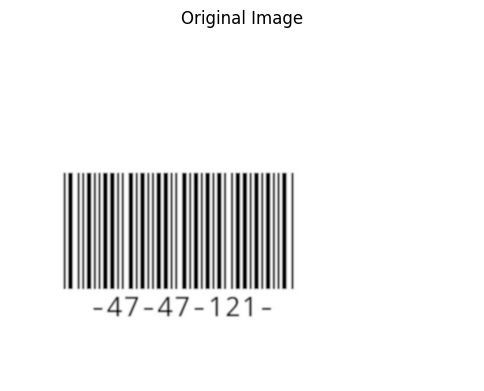

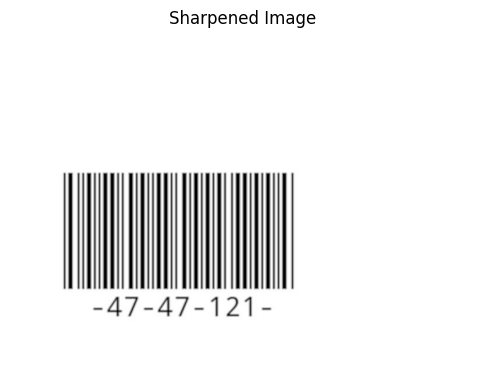

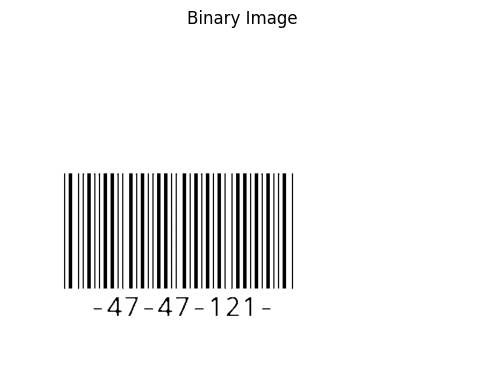

Processing 05 - meen taffa el nour!!!.jpg...
Standard deviation for test cases\05 - meen taffa el nour!!!.jpg: 4.441884023353947
Image is low contrast.


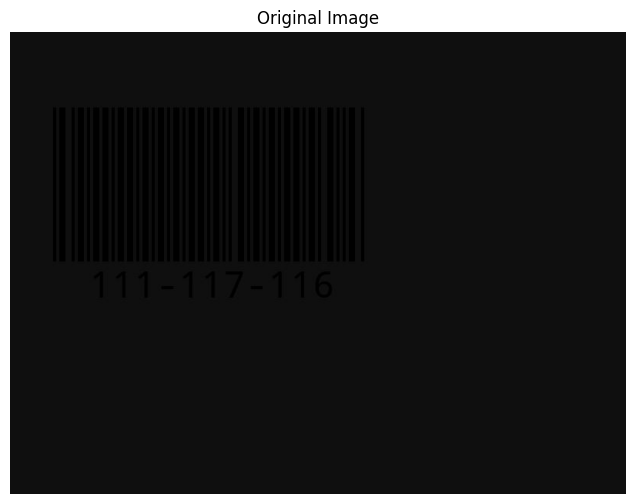

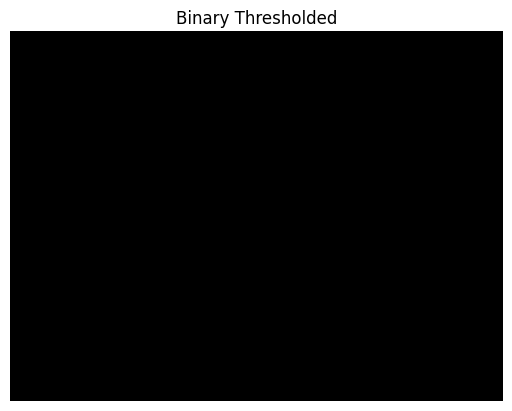

Processed image is still blurry, applying blur correction.


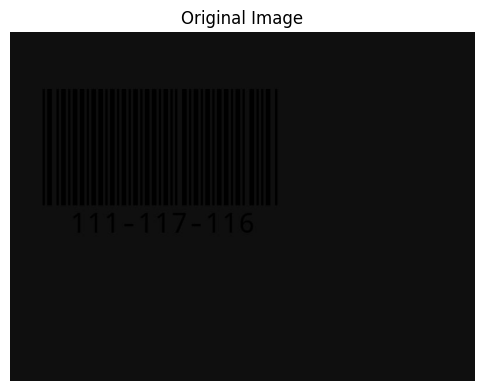

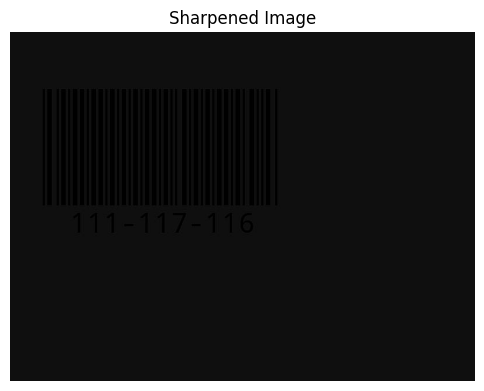

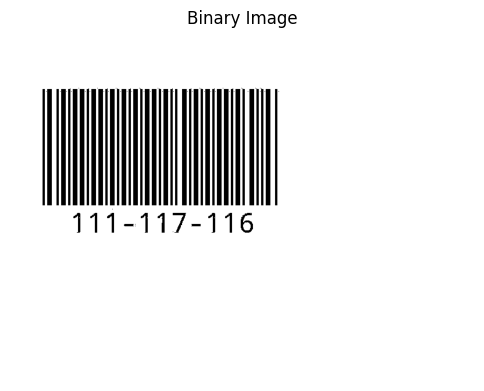

Processing 06 - meen fata7 el nour 333eenaaayy.jpg...
Standard deviation for test cases\06 - meen fata7 el nour 333eenaaayy.jpg: 4.099897747390556
Image is low contrast.


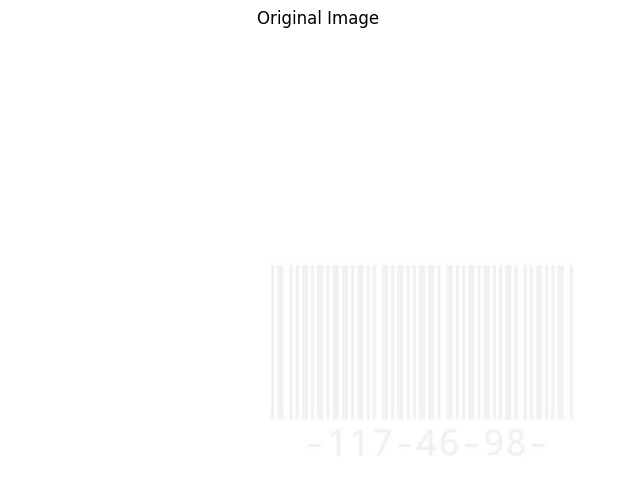

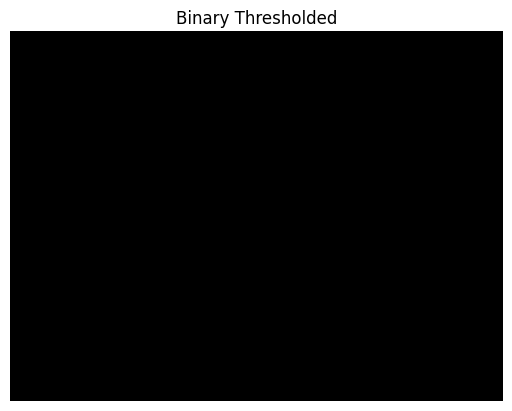

Processed image is still blurry, applying blur correction.


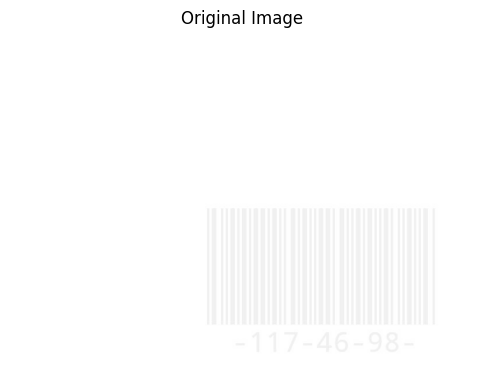

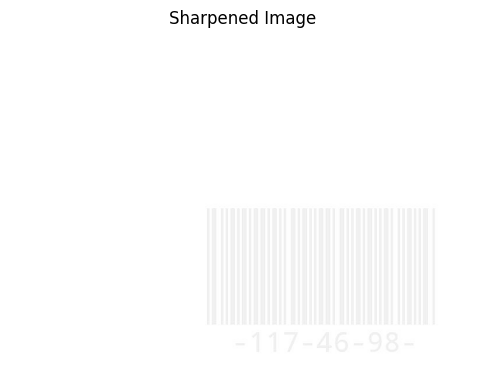

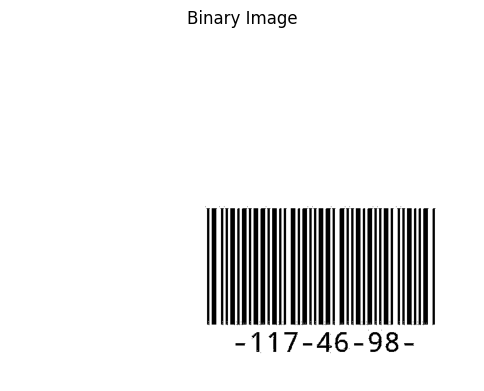

Processing 07 - mal7 w felfel.jpg...
Standard deviation for test cases\07 - mal7 w felfel.jpg: 70.44799317837717
Image is not low contrast.
Image is not blurry.
Processing 08 - compresso espresso.jpg...
Standard deviation for test cases\08 - compresso espresso.jpg: 36.951923522463375
Image is not low contrast.
Image is not blurry.
Processing 09 - e3del el soora ya3ammm.jpg...
Standard deviation for test cases\09 - e3del el soora ya3ammm.jpg: 65.49477766328218
Image is not low contrast.
Image is not blurry.
Processing 10 - wen el kontraastttt.jpg...
Standard deviation for test cases\10 - wen el kontraastttt.jpg: 1.7948836100833006
Image is low contrast.


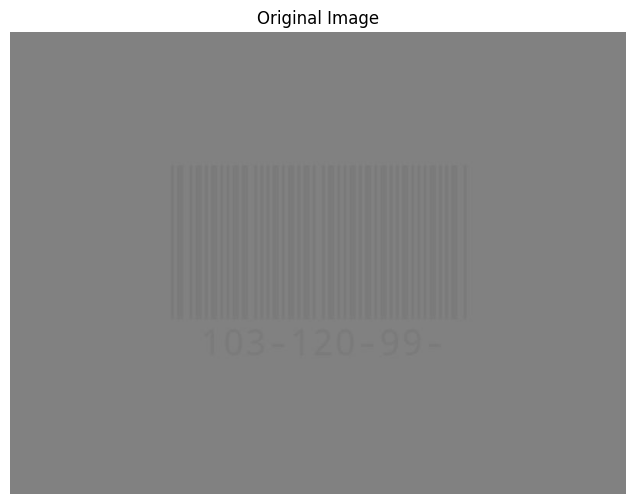

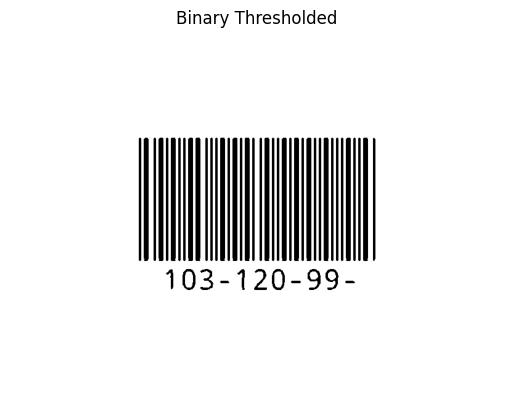

Processed image is still blurry, applying blur correction.


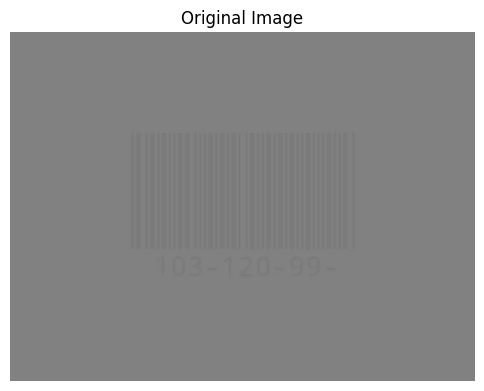

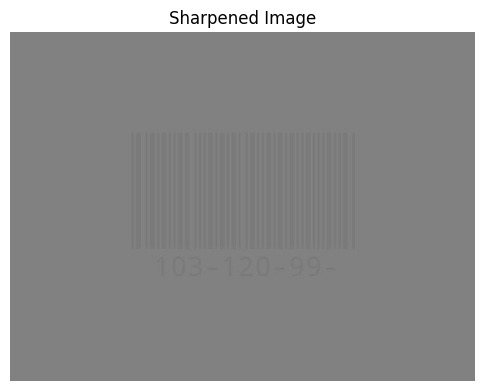

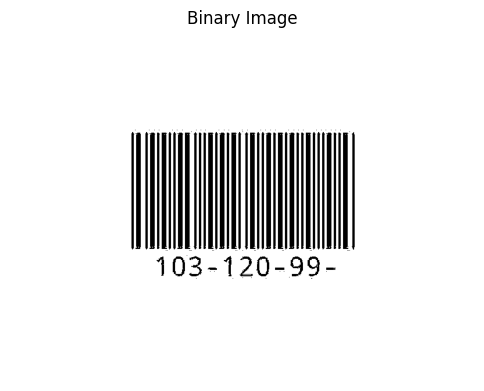

Processing 11 - bayza 5ales di bsara7a.jpg...
Standard deviation for test cases\11 - bayza 5ales di bsara7a.jpg: 59.95659661792795
Image is not low contrast.
Image is not blurry.


In [26]:
def detect_blurry_and_contrast_image(image_path):
    """
    Analyze an image for low contrast and blurriness, process it accordingly,
    and provide feedback on its status.

    Parameters:
    - image_path (str): Path to the image file.
    """
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Detect low contrast
    if detect_Low_contrast_image(image_path):
        print("Image is low contrast.")
        binary_image = process_low_contrast_image(image_path)  # Processing low contrast image

        # Detect if the resulting image from low contrast processing is blurry
        is_blurry, _ = detect_blurry_image(image_path)
        if is_blurry:
            print("Processed image is still blurry, applying blur correction.")
            process_blurry_images(image_path)  # Further processing if blurry
        else:
            print("Processed image is not blurry.")
            return False
    else:
        print("Image is not low contrast.")

        # Check for blurriness on the original image
        is_blurry, _ = detect_blurry_image(image_path)
        if is_blurry:
            print("Image is blurry.")
            process_blurry_images(image_path)  # Processing blurry image
        else:
            print("Image is not blurry.")
            return False



# Directory containing the images
image_dir = "test cases"

# Iterate over each image file in the directory
for image_name in os.listdir(image_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_path = os.path.join(image_dir, image_name)
        print(f"Processing {image_name}...")
        detect_blurry_and_contrast_image(image_path)
    else:
        print(f"Skipping {image_name}, not an image file.")
    

